In [3]:
"""
Problem III
Question 2. Dimensionality Reduction. 
    Upload the entire dataset into Python and R. Apply Principal Components Analysis in R and Python 
    to reduce the dimensionality of the full dataset.  
     - How many dimensions (= attributes) does the original dataset contain? 
     - How many dimensions are obtained after PCA? 
     - How much of the variance do they explain? 
     - Include in your report the linear combinations that define the first new attribute (= component) 
    obtained. Look at the results and elaborate on any interesting observations you can make about 
    the results.
"""
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
%matplotlib inline
# Loading data
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',

                            'model', 'origin', 'car_name'])
data = data.drop(columns='car_name')
df_num = data[data['horsepower'] != '?'].astype(float)

# standardize the data 
df_stdrd = (df_num-df_num.mean())/df_num.std()
df_stdrd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726


In [5]:
# standardize the data
l_stdrd = scale(df_num.values)
df_stdrd = pd.DataFrame(l_stdrd, columns = df_stdrd.columns)
df_stdrd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [7]:
#run PCA on standardized data
pca = PCA(n_components=8)
X = pca.fit_transform(df_stdrd)
X_pca = pca.transform(X)

# set up a list to index components starting with #1 instead of zero
pc_nums = list(range(1, X_pca.shape[1]+1))
# save component data as a dataframe.  Use new index array for indexing df
comp_df = pd.DataFrame(pca.components_, columns=df_stdrd.columns, index=pc_nums)

# add column with total explained variance for each component
comp_df["VARIANCE"] = pca.explained_variance_ratio_



,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,VARIANCE
1,0.39,0.40,0.42,0.40,0.40,0.26,0.21,0.28,0.67
2,0.08,0.14,0.13,0.11,0.21,0.42,0.69,0.50,0.12
3,0.29,0.07,0.07,0.24,0.00,0.64,0.59,0.31,0.10
4,0.10,0.22,0.14,0.12,0.32,0.49,0.11,0.74,0.06
5,0.74,0.48,0.30,0.08,0.13,0.10,0.30,0.05,0.02
6,0.39,0.53,0.01,0.67,0.24,0.20,0.11,0.12,0.01
7,0.20,0.28,0.08,0.54,0.72,0.23,0.13,0.03,0.01
8,0.12,0.42,0.83,0.13,0.31,0.04,0.05,0.08,0.00


1    0.671984
2    0.117958
3    0.101455
4    0.060769
5    0.022853
6    0.014290
7    0.006693
8    0.003996
Name: VARIANCE, dtype: float64

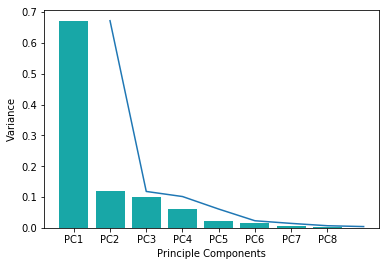

In [18]:
df_pca = pd.DataFrame({'Variance':comp_df["VARIANCE"],
             'Principle Components':['PC1','PC2','PC3','PC4', 'PC5','PC6', 'PC7', 'PC8']})
sns.barplot(x='Principle Components',y="Variance", 
            data=df_pca, color="c");
plt.plot(comp_df["VARIANCE"])
#display dataframe with rounded values
comp_df["VARIANCE"]

In [19]:
round(abs(comp_df),2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,VARIANCE
1,0.39,0.40,0.42,0.40,0.40,0.26,0.21,0.28,0.67
2,0.08,0.14,0.13,0.11,0.21,0.42,0.69,0.50,0.12
3,0.29,0.07,0.07,0.24,0.00,0.64,0.59,0.31,0.10
4,0.10,0.22,0.14,0.12,0.32,0.49,0.11,0.74,0.06
5,0.74,0.48,0.30,0.08,0.13,0.10,0.30,0.05,0.02
6,0.39,0.53,0.01,0.67,0.24,0.20,0.11,0.12,0.01
7,0.20,0.28,0.08,0.54,0.72,0.23,0.13,0.03,0.01
8,0.12,0.42,0.83,0.13,0.31,0.04,0.05,0.08,0.00


In [36]:
"""
Problem III
Question 3. Attribute Transformation. 
 - Convert the car-name attribute into a discrete attribute by changing each car-name into just 
   the car brand (e.g., toyota, ford, audi, ...). 
 - Using this modified dataset, run PCA in Python and R again as you did above and report any 
   changes you observe in the results.
"""
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
def car_name_to_maker(car_name):
    car_maker = car_name[:car_name.find(' ')]
    return car_maker

# encode the car brand
data['car_name'] = data['car_name'].apply(car_name_to_maker).astype('category').cat.codes
data.rename(columns={'car_name':'car_maker'}, inplace=True)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,7
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,3
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,25
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,13


1    0.609724
2    0.120350
3    0.092336
4    0.084549
5    0.050643
6    0.020305
7    0.012650
8    0.005906
9    0.003537
Name: VARIANCE, dtype: float64

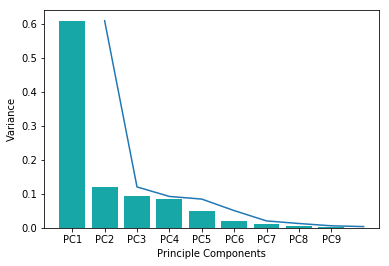

In [35]:
# remove empty value for horsepower
df_num = data[data['horsepower'] != '?'].astype(float)

# standardize the data 
df_stdrd = (df_num-df_num.mean())/df_num.std()

df_stdrd.head()

#run PCA on standardized data
pca = PCA(n_components=9)
X = pca.fit_transform(df_stdrd)
X_pca = pca.transform(X)

# set up a list to index components starting with #1 instead of zero
pc_nums = list(range(1, X_pca.shape[1]+1))
# save component data as a dataframe.  Use new index array for indexing df
comp_df = pd.DataFrame(pca.components_, columns=df_stdrd.columns, index=pc_nums)

# add column with total explained variance for each component
comp_df["VARIANCE"] = pca.explained_variance_ratio_

df_pca = pd.DataFrame({'Variance':comp_df["VARIANCE"],
             'Principle Components':['PC1','PC2','PC3','PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9']})
sns.barplot(x='Principle Components',y="Variance", 
            data=df_pca, color="c");
plt.plot(comp_df["VARIANCE"])
#display dataframe with rounded values
comp_df["VARIANCE"]

In [34]:
round(abs(comp_df),2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_maker,VARIANCE
1,0.38,0.40,0.41,0.40,0.40,0.26,0.21,0.28,0.16,0.61
2,0.06,0.03,0.02,0.17,0.06,0.35,0.45,0.46,0.66,0.12
3,0.25,0.16,0.15,0.18,0.16,0.29,0.79,0.08,0.33,0.09
4,0.17,0.11,0.09,0.12,0.24,0.66,0.02,0.28,0.60,0.08
5,0.09,0.19,0.11,0.11,0.26,0.42,0.08,0.78,0.27,0.05
6,0.74,0.48,0.30,0.09,0.13,0.10,0.30,0.04,0.01,0.02
7,0.39,0.53,0.00,0.67,0.23,0.21,0.11,0.11,0.03,0.01
8,0.20,0.29,0.09,0.53,0.72,0.23,0.13,0.04,0.02,0.01
9,0.12,0.41,0.83,0.13,0.32,0.04,0.06,0.08,0.01,0.00
